In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import classy module
from classy import Class

In [3]:
# first run: using parameters from instruction

In [21]:
# define parameters
params={
    "output": 'tCl,pCl,lCl,mPk', 
    "lensing": 'yes', 
    "omega_cdm": 0.1201,
    "omega_b": 0.02237, 
    "h": 0.67810, 
    "A_s": 2.10e-09,
    "n_s": 0.96,
    "tau_reio": 0.05,
    "P_k_max_1/Mpc": 3.0,
    "T_cmb": 2.72
}

In [22]:
# create the object and set up the parameters
c = Class()
c.set(params)
c.compute()

In [23]:
c.lensed_cl(2500)

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.48773885e-10, ...,
        1.06520099e-17, 1.06119334e-17, 1.05721169e-17]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.14016257e-15, ...,
        3.92964541e-19, 3.93079460e-19, 3.93189484e-19]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.67095467e-13, ...,
        -3.95405901e-19, -3.95595652e-19, -3.95857424e-19]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 2.45144895e-19, ...,
        3.38523007e-21, 3.37770098e-21, 3.37018833e-21]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 8.69898343e-09, ...,
        1.21193154e-22, 1.20866228e-22, 1.20540279e-22]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.82939062e-10, ...,
        2.62689933e-23, 2.63667080e-23, 2.64622088e-23]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}

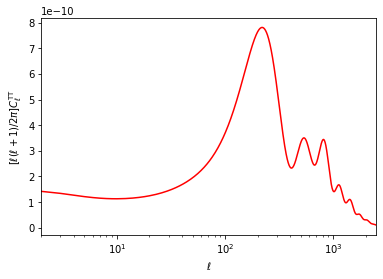

In [24]:
cls = c.lensed_cl(2500)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]

plt.figure()
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$')
plt.plot(ll, clTT*ll*(ll+1)/2./np.pi, 'r-')

In [14]:
# Cold dark matter model
params_cold = {
    "output": 'tCl,pCl,lCl,mPk', 
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "h": 0.6736, 
    "A_s": 2.0989e-09,
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    "P_k_max_1/Mpc": 3.0,
    "T_cmb": 2.72548
}

In [15]:
# create the object and set up the parameters
cold = Class()
cold.set(params_cold)
cold.compute()
cold.lensed_cl(2500)

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.44481437e-10, ...,
        1.06934766e-17, 1.06528892e-17, 1.06125492e-17]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.39562550e-15, ...,
        3.88211740e-19, 3.88340628e-19, 3.88466428e-19]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.71673138e-13, ...,
        -3.94744881e-19, -3.94671356e-19, -3.94673153e-19]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 2.41742119e-19, ...,
        3.36727194e-21, 3.35979192e-21, 3.35232783e-21]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 8.66888067e-09, ...,
        1.20957387e-22, 1.20631027e-22, 1.20305642e-22]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.70757983e-10, ...,
        2.47416594e-23, 2.47898002e-23, 2.48373636e-23]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}

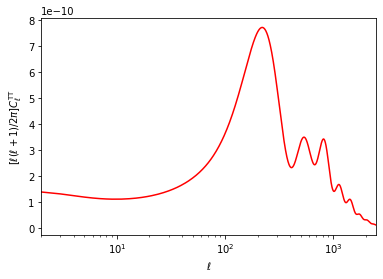

In [64]:
cls_c = cold.lensed_cl(2500)
ll_c = cls_c['ell'][2:]
clTT_c = cls_c['tt'][2:]

plt.figure(1)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$')
plt.plot(ll_c, clTT_c*ll_c*(ll_c+1)/2./np.pi, 'r-')

In [74]:
kk_c = np.logspace(-4, np.log10(3), 1000)
Pk_c = []
for k in kk_c:
    Pk_c.append(cold.pk(k, 0.))

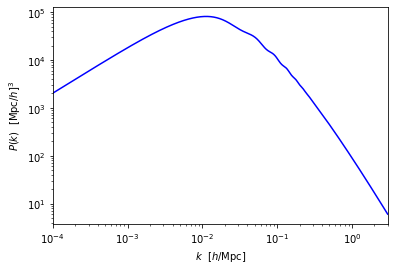

In [75]:
plt.figure(2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(kk[0], kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_c, Pk_c, 'b-')

In [76]:
# Warm dark matter model
params_warm = {
    "output": 'tCl,pCl,lCl,mPk', 
    "lensing": 'yes', 
    "omega_cdm": 0,
    "omega_b": 0.02237, 
    "omega_ncdm": 0.12,
    "h": 0.6736, 
    "A_s": 2.0989e-09,
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    "P_k_max_1/Mpc": 3.0,
    "T_cmb": 2.72548, 
    "m_ncdm":1000, 
    "N_ncdm":1,
    "T_ncdm": 100,
    "deg_ncdm":3
}

In [77]:
# create the object and set up the parameters
warm = Class()
warm.set(params_warm)
warm.compute()
warm.lensed_cl(2500)

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.45123199e-10, ...,
        1.12591052e-17, 1.12083731e-17, 1.11576838e-17]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.34296682e-15, ...,
        3.32825172e-19, 3.32974857e-19, 3.33147945e-19]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.72939529e-13, ...,
        -3.49174528e-19, -3.44687523e-19, -3.40320476e-19]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 3.95224431e-20, ...,
        3.18378015e-22, 3.17374604e-22, 3.16374891e-22]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 8.42260558e-09, ...,
        9.86664349e-29, 9.80509388e-29, 9.74403594e-29]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.65270989e-10, ...,
        1.13335738e-25, 1.12039478e-25, 1.10753046e-25]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}

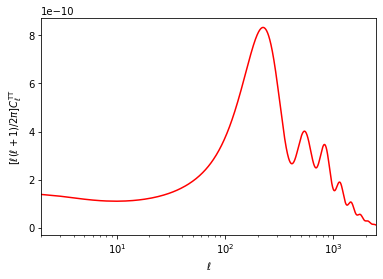

In [78]:
cls_w = warm.lensed_cl(2500)
ll_w = cls_w['ell'][2:]
clTT_w = cls_w['tt'][2:]

plt.figure(1)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$')
plt.plot(ll_w, clTT_w*ll_w*(ll_w+1)/2./np.pi, 'r-')

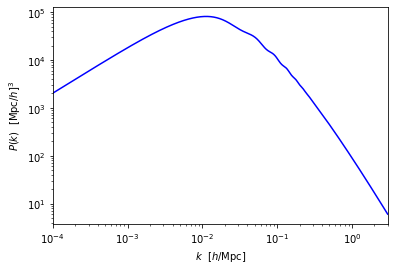

In [79]:
kk_w = np.logspace(-4, np.log10(3), 1000)
Pk_w = []
for k in kk_w:
    Pk_w.append(cold.pk(k, 0.))
plt.figure(2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(kk_w[0], kk_w[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_w, Pk_w, 'b-')